i wanted to pull out the clusteres that are built into the sns clustermap quantitatively using the dendrograms
but this exmaple: https://itecnote.com/tecnote/python-extracting-clusters-from-seaborn-clustermap/
has some re-writing back to the beginning so im going to try that here

## 04_temporalOutlinksHeatmap
Take in the outlink temporal inclusion dataframes and create clustered heatmaps based on temporal inclusion

import:

    02_outlinkInclusiondf_en.pkl
    02_outlinkInclusiondf_ar.pkl
    
output:

    

The Plan:
- get temporal inclusion dataframes
- plot a heatmap of a subsection of the data
- find the pairwise distances of their temporal inclusion
- plot a subection of these pairwise distances
- plot all of the pairwise distances
- cluster the outlinks by their pairwise distancs

    
Plan
1. English
2. Arabic

In [1]:
#import necessary things
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#for identifying dendrograms
from collections import defaultdict
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette
from fastcluster import linkage as flinkage
import seaborn as sns
from matplotlib.colors import rgb2hex, colorConverter


### Functions

In [2]:
#since it's difficult to keep track of what color e.g. '
# #c13d3f' is, we make make an IPython notebook compatible HTML representation of the 
# dictionary holding the information. Objects of this class will behave just like dictionaries, 
# except for representing them as a HTML table.

#(Note that the representation uses colerConverter from matplotlib, so it supports 
#any matplotlib supported color representation, not only hex color strings.)

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'
        
        html += '</table>'
        
        return html

In [3]:
def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))
    
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l
    
    return cluster_classes

## 1. English

In [4]:
# with open('..Data/00_outlinkInclusiondf_en.pkl.pkl', 'rb') as f:
#     en_data = pickle.load(f)

with open('../Data/00_outlinkInclusiondf_en.pkl', 'rb') as f:
    en_data = pickle.load(f)
    
with open('../Data/02b_cosineLinks_en.pkl', 'rb') as f:
    pairDf_en = pickle.load(f)    

In [5]:
pairDf_en.head()

,15 October 2011 global protests,17 October Revolution,2000s energy crisis,2004–05 Palestinian local elections,2005 Ahvaz unrest,2005 Palestinian presidential election,2006 Palestinian legislative election,2007–2008 world food price crisis,2008 Armenian presidential election,2009 Iranian presidential election protests,...,YouTube,Youth,Youthquake,Youthquake (movement),Yoweri Museveni,Zaydism,Zeynep Tufekci,Zimbabwe,Zine El Abidine Ben Ali,Zouérat
15 October 2011 global protests,1.0000,0.0,0.0,0.0,0.3669,0.0,0.0,0.661143,0.0,0.930949,...,0.000000,0.459933,0.0,0.700067,0.0,0.000000,0.000000,0.0,0.571878,0.423659
17 October Revolution,0.0000,1.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.000000,...,0.455983,0.000000,0.0,0.000000,0.0,0.480384,0.491304,0.0,0.363422,0.000000
2000s energy crisis,0.0000,0.0,1.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.000000,...,0.099504,0.000000,0.0,0.000000,0.0,0.104828,0.107211,0.0,0.079305,0.000000
2004–05 Palestinian local elections,0.0000,0.0,0.0,1.0,0.0000,1.0,1.0,0.164399,0.0,0.129099,...,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,1.0,0.079305,0.000000
2005 Ahvaz unrest,0.3669,0.0,0.0,0.0,1.0000,0.0,0.0,0.434959,0.0,0.341565,...,0.000000,0.000000,0.0,0.460566,0.0,0.000000,0.000000,0.0,0.209822,0.577350


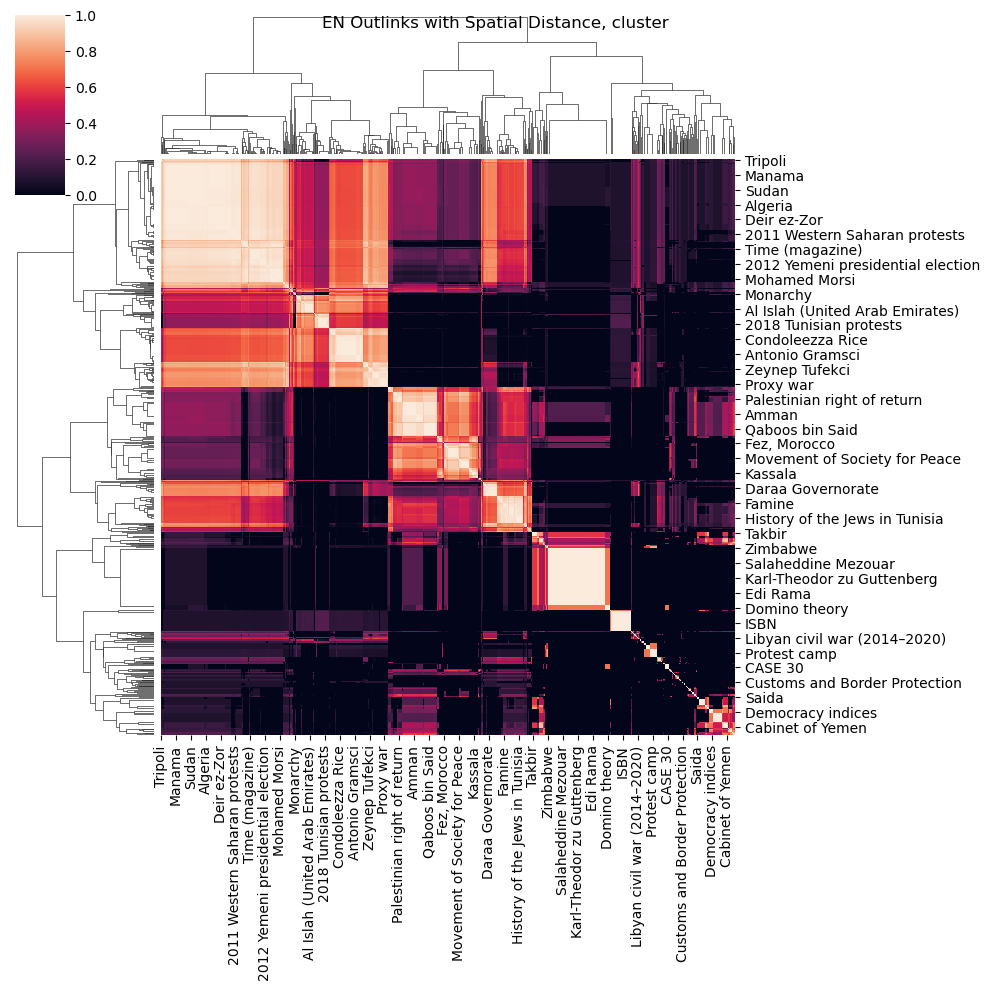

In [6]:
#plot cluster plot
clusterPlt = sns.clustermap(pairDf_en)
clusterPlt.fig.suptitle("EN Outlinks with Spatial Distance, cluster")
clusterPlt

## 1a. Get Dendrograms

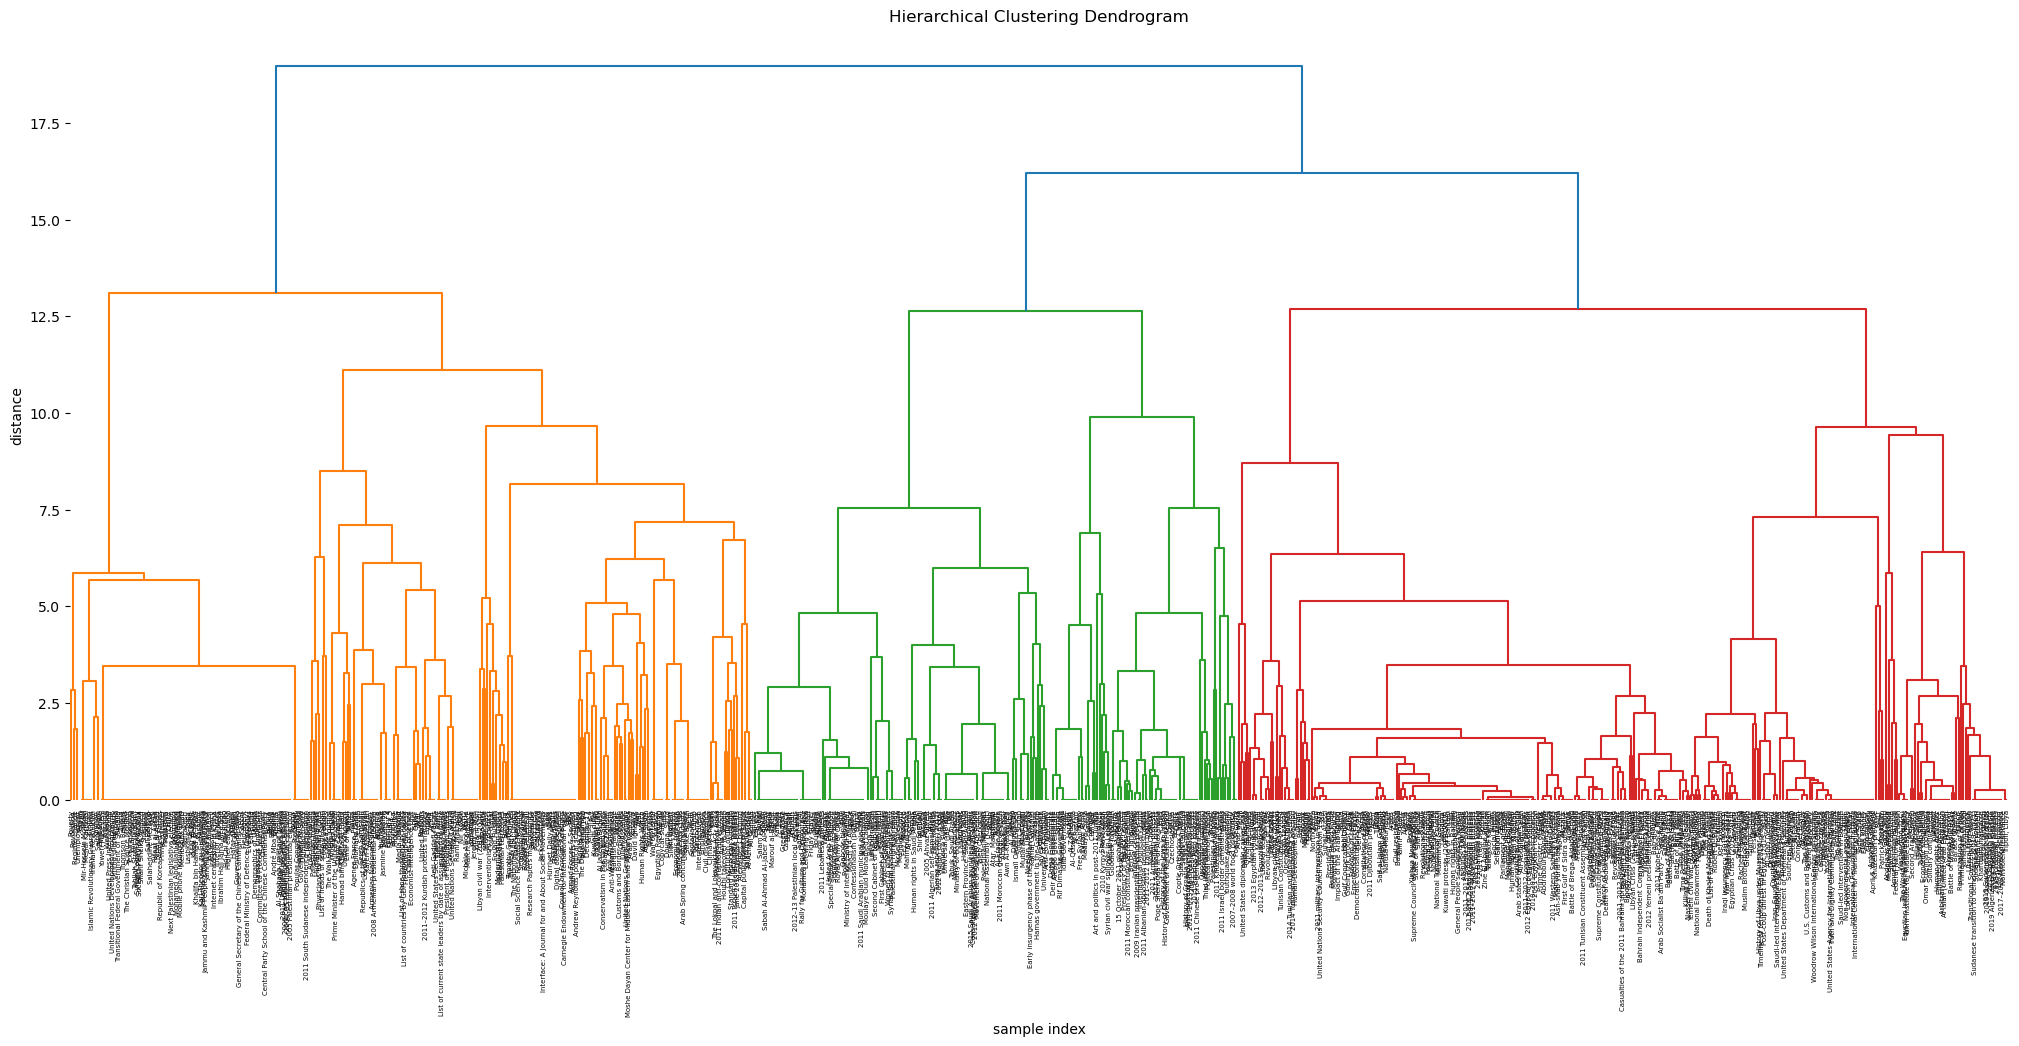

In [7]:
#https://nbviewer.org/gist/vals/150ec97a5b7db9c82ee9

Z = flinkage(pairDf_en, method='complete')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
den = dendrogram(Z, labels=pairDf_en.index)#, abv_threshold_color='#AAAAAA')
plt.xticks(rotation=90)
no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
sns.despine(**no_spine);
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

plt.show()

In [8]:
cluster_idxs = defaultdict(list)
for c, pi in zip(den['color_list'], den['icoord']):
    for leg in pi[1:3]:
        i = (leg - 5.0) / 10.0
        if abs(i - int(i)) < 1e-5:
            cluster_idxs[c].append(int(i))

In [9]:
cluster_classes = Clusters()
for c, l in cluster_idxs.items():
    i_l = [den['ivl'][i] for i in l]
    cluster_classes[c] = i_l

In [10]:
cluster_classes

C1
C2
C3


## 2 - Arabic

In [11]:
with open('../Data/00_outlinkInclusiondf_ar.pkl', 'rb') as f:
    ar_data = pickle.load(f)
    
ar_data.head()

timestamp,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2024-01-31,2024-02-29,2024-05-31,2024-06-30
1 أغسطس,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1 فبراير,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11 فبراير,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
12 مايو,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
13 أبريل,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
